In [1]:
# Importing library

import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Ignoring Warnings

import warnings
warnings.filterwarnings("ignore")

In [35]:
# loading Dataset

import os
os.chdir("C:/Users/swethabalaji/Downloads")
df=pd.read_csv("OnlineNewsPopularity.csv")

In [36]:
df.shape

(39644, 61)

In [37]:
# Removing space character in the feature names

df.columns=df.columns.str.replace(' ','')

In [38]:
# Droping  url & timedelta

df1=df.drop(["url","timedelta"], axis=1)

In [39]:
df1.shape

(39644, 59)

In [40]:
# Droping catogorical values from df1.
# Now df2_num  dataframe contains numerical feaures.

df2_num=df1.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

In [41]:
df2_num.shape

(39644, 45)

In [42]:
# df2_cat dataframe contains catagoricl features.

df2_cat=df1[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [43]:
df2_cat.shape

(39644, 14)

In [44]:
#Droping highly correlated features and target feature

df2_num_new=df2_num.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min","shares"], axis=1)

In [45]:
df2_num_new.shape

(39644, 41)

In [46]:
# creating a new copy of df2_num_new

df3=df2_num_new

In [47]:
# Applying power transformation. method = BOX-COX

In [48]:
# Finding negative values.

negcols=df3.columns[(df3<=0).any()]
negcols

Index(['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [49]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df3[i].min()
    name=i +'_new'
    print(name)
    df3[name]=((df3[i]+1)-m)

n_tokens_content_new
n_unique_tokens_new
num_hrefs_new
num_self_hrefs_new
num_imgs_new
num_videos_new
average_token_length_new
kw_min_min_new
kw_max_min_new
kw_min_max_new
kw_max_max_new
kw_avg_max_new
kw_min_avg_new
kw_max_avg_new
kw_avg_avg_new
self_reference_min_shares_new
self_reference_max_shares_new
self_reference_avg_sharess_new
LDA_00_new
LDA_01_new
LDA_02_new
LDA_03_new
LDA_04_new
global_subjectivity_new
global_sentiment_polarity_new
global_rate_positive_words_new
global_rate_negative_words_new
rate_positive_words_new
rate_negative_words_new
avg_positive_polarity_new
min_positive_polarity_new
max_positive_polarity_new
avg_negative_polarity_new
min_negative_polarity_new
max_negative_polarity_new
title_subjectivity_new
title_sentiment_polarity_new
abs_title_subjectivity_new
abs_title_sentiment_polarity_new


In [50]:
# Droping old negative column

for i in negcols:
    df3.drop(i,axis=1,inplace=True)

In [51]:
# Checking negative columns

negcols=df3.columns[(df3<=0).any()]
negcols

Index([], dtype='object')

In [52]:
# Applying Box-cox Method

from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
BC_data=pt.fit_transform(df3)

In [53]:
bc_data=(pd.DataFrame(BC_data,columns=df3.columns))

In [54]:
# Checking outlier once again after applying Box-Cox method.

In [55]:
bc_data['kw_max_min_new'].describe().T

count    39644.000000
mean        13.350379
std          3.982982
min          0.000000
25%         11.828717
50%         13.193647
75%         14.753095
max         55.991639
Name: kw_max_min_new, dtype: float64

In [56]:
# Outliers treatment.

In [57]:
#Treating outlier :  

for col in bc_data.columns:
    percentiles = bc_data[col].quantile([0.01,0.99]).values
    bc_data[col][bc_data[col] <= percentiles[0]] = percentiles[0]
    bc_data[col][bc_data[col] >= percentiles[1]] = percentiles[1]

In [58]:
# Combining numeric features and catogorical features.

df3_con=pd.concat([bc_data,df2_cat],axis=1)

In [59]:
df3_con.shape

(39644, 55)

# PCA

In [60]:
# y=df1['shares']

In [61]:
df3_con['popularity'] = pd.qcut(df1['shares'], 3, labels=False)

# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(df1['shares']>=1400))

In [62]:
y=df3_con['popularity']

In [63]:
X=df3_con.drop('popularity',axis=1)

In [64]:
y.value_counts()

0    14732
2    12955
1    11957
Name: popularity, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [67]:
from sklearn.decomposition import PCA

# with all features as input
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [68]:
# Fitting Logistic Regression To the training set  and predict with test data


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [69]:
# making confusion matrix between 
#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[3563  939    0]
 [2668  886    0]
 [2814 1024    0]]
Accuracy : 0.3740541449470321


In [70]:
pca.explained_variance_ratio_

array([1.00000000e+00, 6.01065046e-27, 2.69468605e-29, 1.53811980e-29,
       4.26581319e-31, 1.31153269e-31, 1.03918255e-31, 9.41663565e-32,
       5.87478906e-32, 3.82411763e-32, 1.36531766e-32, 1.04647540e-32,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.75323070e-33, 9.75323070e-33, 9.75323070e-33,
       9.75323070e-33, 9.34106147e-33, 9.08198488e-35])

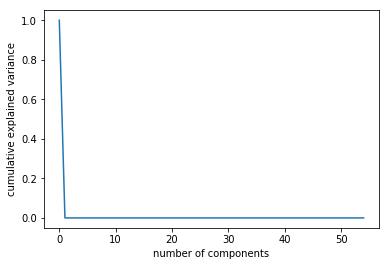

In [71]:
#SCREE PLOT
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [72]:
## PCA using 2 features

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [73]:
modelscore=[]

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logr = LogisticRegression()

logr.fit(X_train,y_train)
ypred=logr.predict(X_test)

print("Tain score: " ,logr.score(X_train, y_train)) #trainscore

lr_score=metrics.accuracy_score(y_test, ypred)
print("Test Score: ", lr_score) #testscore

Tain score:  0.36767567567567566
Test Score:  0.3740541449470321


In [105]:
modelscore.append(['log',lr_score])

In [75]:
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.39      0.79      0.53      4502
           1       0.31      0.25      0.28      3554
           2       0.00      0.00      0.00      3838

   micro avg       0.37      0.37      0.37     11894
   macro avg       0.23      0.35      0.27     11894
weighted avg       0.24      0.37      0.28     11894



In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train,y_train)
ypred1=knn.predict(X_test)

print("Tain score: " ,knn.score(X_train, y_train)) #trainscore

knn_score=metrics.accuracy_score(y_test, ypred1)
print("Test Score: ", knn_score) #testscore


Tain score:  0.36418018018018017
Test Score:  0.31133344543467295


In [107]:
modelscore.append(['Knn',knn_score])

In [77]:
print(metrics.classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.27      0.07      0.11      4502
           1       0.50      0.00      0.00      3554
           2       0.32      0.88      0.47      3838

   micro avg       0.31      0.31      0.31     11894
   macro avg       0.36      0.32      0.19     11894
weighted avg       0.35      0.31      0.19     11894



In [78]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

ypred2=dtc.predict(X_test)

print("Tain score: " ,dtc.score(X_train, y_train)) #trainscore

dtc_score=metrics.accuracy_score(y_test, ypred2)
print("Test Score: ", dtc_score) #testscore


Tain score:  0.3796756756756757
Test Score:  0.38590886161089627


In [79]:
modelscore.append(['DT',dtc_score])

In [80]:
print(metrics.classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.39      0.94      0.55      4502
           1       0.35      0.08      0.13      3554
           2       0.32      0.02      0.04      3838

   micro avg       0.39      0.39      0.39     11894
   macro avg       0.35      0.35      0.24     11894
weighted avg       0.35      0.39      0.26     11894



In [81]:
from sklearn.naive_bayes import GaussianNB

gb=GaussianNB()
gb.fit(X_train,y_train)

ypred3=gb.predict(X_test)

print("Tain score: " ,gb.score(X_train, y_train)) #trainscore

gb_score=metrics.accuracy_score(y_test, ypred3)
print("Test Score: ", gb_score) #testscore

Tain score:  0.37535135135135134
Test Score:  0.38952412981335127


In [111]:
modelscore.append(['GB',gb_score])

In [82]:
print(metrics.classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.39      0.89      0.55      4502
           1       0.32      0.09      0.14      3554
           2       0.44      0.08      0.13      3838

   micro avg       0.39      0.39      0.39     11894
   macro avg       0.38      0.35      0.27     11894
weighted avg       0.39      0.39      0.29     11894



In [83]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

ypred4=rf.predict(X_test)

print("Tain score: " ,rf.score(X_train, y_train)) #trainscore

rf_score=metrics.accuracy_score(y_test, ypred4)
print("Test Score: ", rf_score) #testscore

Tain score:  0.37963963963963965
Test Score:  0.38590886161089627


In [84]:
modelscore.append(['rf',rf_score])

In [85]:
print(metrics.classification_report(y_test, ypred4))

              precision    recall  f1-score   support

           0       0.39      0.95      0.55      4502
           1       0.35      0.07      0.11      3554
           2       0.32      0.02      0.04      3838

   micro avg       0.39      0.39      0.39     11894
   macro avg       0.35      0.35      0.24     11894
weighted avg       0.36      0.39      0.26     11894



In [86]:
modelscore

[['DT', 0.38590886161089627], ['rf', 0.38590886161089627]]

In [115]:
scores = pd.DataFrame(modelscore, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

,Name,Score
1,Knn,0.297125
0,log,0.374054
2,DT,0.385909
3,GB,0.389524
4,rf,0.390701


from sklearn.ensemble import AdaBoostClassifier as ABC
logrboost=ABC(base_estimator=logr,n_estimators=50)
#knnboost=ABC(base_estimator=knn,n_estimators=50)
dtboost=ABC(base_estimator=dtc,n_estimators=50)
gtboost=ABC(base_estimator=gb,n_estimators=50)
rfboost=ABC(base_estimator=rf,n_estimators=50)
modelscore_PCA=[]

for model, name in zip([logrboost,dtboost,gtboost,rfboost],
                       ['LogRBag','dtboost','gtboost','rfboost']):
    #for train,test in kf.split(X,Y):
       # Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
       # Ytrain,Ytest=Y[train],Y[test]
    model.fit(X_train,y_train)
    ypredict=model.predict(X_test)
    modelscore_PCA.append([name,metrics.accuracy_score(y_test,ypredict)])


scores = pd.DataFrame(modelscore_PCA, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

from sklearn.ensemble import BaggingClassifier as BC
logrboost=BC(base_estimator=logr,n_estimators=50)
#knnboost=ABC(base_estimator=knn,n_estimators=50)
dtboost=BC(base_estimator=dtc,n_estimators=50)
gtboost=BC(base_estimator=gb,n_estimators=50)
rfboost=BC(base_estimator=rf,n_estimators=50)
modelscore_bagging_PCA=[]

for model, name in zip([logrboost,dtboost,gtboost,rfboost],
                       ['LogRBag','dtbag','gtbag','rfbag']):
    #for train,test in kf.split(X,Y):
       # Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
       # Ytrain,Ytest=Y[train],Y[test]
    model.fit(X_train,y_train)
    ypredict=model.predict(X_test)
    modelscore_bagging_PCA.append([name,metrics.accuracy_score(y_test,ypredict)])


modelscore_PCA

scores = pd.DataFrame(modelscore_bagging_PCA, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

# RFE Features:40

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 40)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False  True  True False False  True  True  True False  True  True  True
  True False  True  True False  True  True  True  True False False False
  True False  True  True False  True  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12 14  6  9
  8  1  1 15 16  1  1  1 11  1  1  1  1  2  1  1 10  1  1  1  1  3  5  7
  1 13  1  1  4  1  1]


In [88]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 40)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'max_positive_polarity_new', 'avg_negative_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_sentiment_polarity_new', 'abs_title_subjectivity_new',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'is_weekend', 'data_channel_is_entertainment',
       'data_chann

In [89]:
df7=df3_con[['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'rate_positive_words_new', 'avg_positive_polarity_new',
       'max_positive_polarity_new', 'avg_negative_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']]

In [90]:
df7.shape

(39644, 40)

In [91]:
X=df7

In [92]:
modelscore_rf=[]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logr_rf = LogisticRegression()

logr_rf.fit(X_train,y_train)
ypred=logr_rf.predict(X_test)

print("Tain score: " ,logr_rf.score(X_train, y_train)) #trainscore

lrrfe_score=metrics.accuracy_score(y_test, ypred)
print("Test Score: ", lrrfe_score) #testscore

Tain score:  0.36864864864864866
Test Score:  0.3785101731965697


In [95]:
modelscore_rf.append(['log_rfe',lrrfe_score])

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn_rf=KNeighborsClassifier()

knn_rf.fit(X_train,y_train)
ypred1=knn_rf.predict(X_test)

print("Tain score: " ,knn_rf.score(X_train, y_train)) #trainscore

knnrfe_score=metrics.accuracy_score(y_test, ypred1)
print("Test Score: ", knnrfe_score) #testscore


Tain score:  0.5733333333333334
Test Score:  0.3669076845468303


In [97]:
print(metrics.classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.41      0.56      0.47      4502
           1       0.31      0.28      0.29      3554
           2       0.35      0.22      0.27      3838

   micro avg       0.37      0.37      0.37     11894
   macro avg       0.35      0.35      0.34     11894
weighted avg       0.36      0.37      0.35     11894



In [98]:
modelscore_rf.append(['knn_rfe',knnrfe_score])

In [99]:
from sklearn.tree import DecisionTreeClassifier

dtc_rf=DecisionTreeClassifier()
dtc_rf.fit(X_train,y_train)

ypred2=dtc_rf.predict(X_test)

print("Tain score: " ,dtc_rf.score(X_train, y_train)) #trainscore

dtcrfe_score=metrics.accuracy_score(y_test, ypred2)
print("Test Score: ", dtcrfe_score) #testscore


Tain score:  1.0
Test Score:  0.40491003867496217


In [100]:
modelscore_rf.append(['dtc_rfe',dtcrfe_score])

In [101]:
print(metrics.classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47      4502
           1       0.31      0.31      0.31      3554
           2       0.41      0.42      0.42      3838

   micro avg       0.40      0.40      0.40     11894
   macro avg       0.40      0.40      0.40     11894
weighted avg       0.40      0.40      0.40     11894



In [102]:
from sklearn.naive_bayes import GaussianNB

gb_rf=GaussianNB()
gb_rf.fit(X_train,y_train)

ypred3=gb_rf.predict(X_test)

print("Tain score: " ,gb_rf.score(X_train, y_train)) #trainscore

gbrfe_score=metrics.accuracy_score(y_test, ypred3)
print("Test Score: ", gbrfe_score) #testscore

Tain score:  0.37535135135135134
Test Score:  0.38952412981335127


In [103]:
modelscore_rf.append(['gb_rfe',gbrfe_score])

In [104]:
print(metrics.classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.39      0.89      0.55      4502
           1       0.32      0.09      0.14      3554
           2       0.44      0.08      0.13      3838

   micro avg       0.39      0.39      0.39     11894
   macro avg       0.38      0.35      0.27     11894
weighted avg       0.39      0.39      0.29     11894



In [105]:
from sklearn.ensemble import RandomForestClassifier

rf_rfe=RandomForestClassifier()
rf_rfe.fit(X_train,y_train)

ypred4=rf_rfe.predict(X_test)

print("Tain score: " ,rf_rfe.score(X_train, y_train)) #trainscore

rf_rfe_score=metrics.accuracy_score(y_test, ypred4)
print("Test Score: ", rf_rfe_score) #testscore

Tain score:  0.9864504504504504
Test Score:  0.45375819741045903


In [108]:
print(metrics.classification_report(y_test, ypred4))

              precision    recall  f1-score   support

           0       0.51      0.60      0.55      4502
           1       0.35      0.30      0.32      3554
           2       0.46      0.43      0.44      3838

   micro avg       0.45      0.45      0.45     11894
   macro avg       0.44      0.44      0.44     11894
weighted avg       0.45      0.45      0.45     11894



In [106]:
modelscore_rf.append(['rf_rfe',rf_rfe_score])

In [107]:
scores = pd.DataFrame(modelscore_rf, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

,Name,Score
1,knn_rfe,0.366908
0,log_rfe,0.378510
3,gb_rfe,0.389524
2,dtc_rfe,0.404910
4,rf_rfe,0.453758


In [140]:
logrboost=ABC(base_estimator=logr_rf,n_estimators=50)
#knnboost=ABC(base_estimator=knn,n_estimators=50)
dtboost=ABC(base_estimator=dtc_rf,n_estimators=50)
gtboost=ABC(base_estimator=gb_rf,n_estimators=50)
rfboost=ABC(base_estimator=rf_rfe,n_estimators=50)
modelscore_RFE40=[]

In [141]:
for model, name in zip([logrboost,dtboost,gtboost,rfboost],
                       ['LogRBag','dtboost','gtboost','rfboost']):
    #for train,test in kf.split(X,Y):
       # Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
       # Ytrain,Ytest=Y[train],Y[test]
    model.fit(X_train,y_train)
    ypredict=model.predict(X_test)
    modelscore_RFE40.append([name,metrics.accuracy_score(y_test,ypredict)])


In [142]:
scores = pd.DataFrame(modelscore_RFE40, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

,Name,Score
0,LogRBag,0.378510
2,gtboost,0.378678
1,dtboost,0.399109
3,rfboost,0.468892


# RFE Features:50

In [135]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 50)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_02_new', 'LDA_03_new',
       'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new', 'abs_title_subjectivity_new',
       'abs_title_sentiment_polarity_new', 'weekday_is_mon

In [136]:
df8=df3_con[['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'rate_positive_words_new', 'avg_positive_polarity_new',
       'max_positive_polarity_new', 'avg_negative_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']]

In [137]:
df8.shape

(39644, 40)

In [139]:
X=df8
modelscore_rf_50=[]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logr_rf = LogisticRegression()

logr_rf.fit(X_train,y_train)
ypred=logr_rf.predict(X_test)

print("Tain score: " ,logr_rf.score(X_train, y_train)) #trainscore

lrrfe_score=metrics.accuracy_score(y_test, ypred)
print("Test Score: ", lrrfe_score) #testscore

Tain score:  0.36864864864864866
Test Score:  0.3785101731965697


# RFE Features:35

In [109]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 35)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'rate_positive_words_new',
       'avg_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new', 'abs_title_subjectivity_new',
       'is_weekend', 'data_channel_is_entertainment', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')


In [110]:
df9=df3_con[['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'num_hrefs_new', 'num_self_hrefs_new', 'num_imgs_new',
       'average_token_length_new', 'kw_min_min_new', 'kw_max_min_new',
       'kw_min_max_new', 'kw_max_max_new', 'kw_avg_max_new', 'kw_min_avg_new',
       'kw_max_avg_new', 'kw_avg_avg_new', 'self_reference_min_shares_new',
       'self_reference_max_shares_new', 'self_reference_avg_sharess_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'rate_positive_words_new', 'avg_positive_polarity_new',
       'max_positive_polarity_new', 'avg_negative_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_sentiment_polarity_new', 'abs_title_subjectivity_new',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'data_channel_is_entertainment', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']]

In [111]:
df9.shape

(39644, 35)

In [112]:
X=df9

In [113]:
modelscore_rf_35=[]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logr_rf = LogisticRegression()

logr_rf.fit(X_train,y_train)
ypred=logr_rf.predict(X_test)

print("Tain score: " ,logr_rf.score(X_train, y_train)) #trainscore

lrrfe_score=metrics.accuracy_score(y_test, ypred)
print("Test Score: ", lrrfe_score) #testscore

Tain score:  0.36864864864864866
Test Score:  0.3785101731965697


In [116]:
modelscore_rf.append(['rf_rfe',rf_rfe_score])

In [117]:
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55      4502
           1       0.00      0.00      0.00      3554
           2       0.00      0.00      0.00      3838

   micro avg       0.38      0.38      0.38     11894
   macro avg       0.13      0.33      0.18     11894
weighted avg       0.14      0.38      0.21     11894



In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn_rf=KNeighborsClassifier()

knn_rf.fit(X_train,y_train)
ypred1=knn_rf.predict(X_test)

print("Tain score: " ,knn_rf.score(X_train, y_train)) #trainscore

knnrfe_2_score=metrics.accuracy_score(y_test, ypred1)
print("Test Score: ", knnrfe_2_score) #testscore


Tain score:  0.5734774774774775
Test Score:  0.3667395325374138


In [119]:
modelscore_rf_35.append(['knnrfe_2',knnrfe_2_score])

In [120]:
print(metrics.classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.41      0.56      0.47      4502
           1       0.31      0.28      0.29      3554
           2       0.35      0.22      0.27      3838

   micro avg       0.37      0.37      0.37     11894
   macro avg       0.35      0.35      0.34     11894
weighted avg       0.36      0.37      0.35     11894



In [121]:
from sklearn.tree import DecisionTreeClassifier

dtc_rf=DecisionTreeClassifier()
dtc_rf.fit(X_train,y_train)

ypred2=dtc_rf.predict(X_test)

print("Train score: " ,dtc_rf.score(X_train, y_train)) #trainscore

dtcrfe_2_score=metrics.accuracy_score(y_test, ypred2)
print("Test Score: ", dtcrfe_2_score) #testscore


Train score:  1.0
Test Score:  0.41247687909870523


In [122]:
modelscore_rf_35.append(['dtcrfe_2',dtcrfe_2_score])

In [123]:
print(metrics.classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.47      0.46      0.47      4502
           1       0.34      0.35      0.34      3554
           2       0.42      0.41      0.41      3838

   micro avg       0.41      0.41      0.41     11894
   macro avg       0.41      0.41      0.41     11894
weighted avg       0.41      0.41      0.41     11894



In [128]:
from sklearn.naive_bayes import GaussianNB

gb_rf=GaussianNB()
gb_rf.fit(X_train,y_train)

ypred3=gb_rf.predict(X_test)

print("Tain score: " ,gb_rf.score(X_train, y_train)) #trainscore

gbrfe_2_score=metrics.accuracy_score(y_test, ypred3)
print("Test Score: ", gbrfe_2_score) #testscore

Tain score:  0.37535135135135134
Test Score:  0.38952412981335127


In [129]:
modelscore_rf_35.append(['gbrfe_2',gbrfe_2_score])

In [130]:
print(metrics.classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.39      0.89      0.55      4502
           1       0.32      0.09      0.14      3554
           2       0.44      0.08      0.13      3838

   micro avg       0.39      0.39      0.39     11894
   macro avg       0.38      0.35      0.27     11894
weighted avg       0.39      0.39      0.29     11894



In [124]:
from sklearn.ensemble import RandomForestClassifier

rf_rfe=RandomForestClassifier()
rf_rfe.fit(X_train,y_train)

ypred4=rf_rfe.predict(X_test)

print("Tain score: " ,rf_rfe.score(X_train, y_train)) #trainscore

rf_rfe2_score=metrics.accuracy_score(y_test, ypred4)
print("Test Score: ", rf_rfe2_score) #testscore

Tain score:  0.9846846846846847
Test Score:  0.4440894568690096


In [125]:
modelscore_rf_35.append(['rf_rfe_2',rf_rfe2_score])

In [126]:
print(metrics.classification_report(y_test, ypred4))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55      4502
           1       0.33      0.28      0.31      3554
           2       0.45      0.41      0.43      3838

   micro avg       0.44      0.44      0.44     11894
   macro avg       0.43      0.43      0.43     11894
weighted avg       0.43      0.44      0.44     11894



In [127]:
scores = pd.DataFrame(modelscore_rf_35, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

,Name,Score
0,knnrfe_2,0.366740
1,dtcrfe_2,0.412477
2,rf_rfe_2,0.444089


In [ ]:
logrboost=ABC(base_estimator=logr_rf,n_estimators=50)
#knnboost=ABC(base_estimator=knn,n_estimators=50)
dtboost=ABC(base_estimator=dtc_rf,n_estimators=50)
gtboost=ABC(base_estimator=gb_rf,n_estimators=50)
rfboost=ABC(base_estimator=rf_rfe,n_estimators=50)
modelscore_RFE35=[]

In [ ]:
for model, name in zip([logrboost,dtboost,gtboost,rfboost],
                       ['LogRBag','dtboost','gtboost','rfboost']):
    #for train,test in kf.split(X,Y):
       # Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
       # Ytrain,Ytest=Y[train],Y[test]
    model.fit(X_train,y_train)
    ypredict=model.predict(X_test)
    modelscore_RFE35.append([name,metrics.accuracy_score(y_test,ypredict)])


In [ ]:
scores = pd.DataFrame(modelscore_RFE35, columns =['Name', 'Score']) 
scores.sort_values(by=['Score'], inplace=True)
scores

# With all Features of df3_con

In [131]:
X=df3_con.drop('popularity',axis=1)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf_rfe=RandomForestClassifier()
rf_rfe.fit(X_train,y_train)

ypred4=rf_rfe.predict(X_test)

print("Train score: " ,rf_rfe.score(X_train, y_train)) #trainscore

rf_rfe_score=metrics.accuracy_score(y_test, ypred4)
print("Test Score: ", rf_rfe_score) #testscore

Train score:  0.9859099099099099
Test Score:  0.4511518412645031


In [146]:
modelscore_RFE_allfeatures=[]

In [147]:
rfboost=ABC(base_estimator=rf_rfe,n_estimators=50)

In [148]:
for model, name in zip([rfboost],
                       ['rfboost_allFeatures']):
    #for train,test in kf.split(X,Y):
       # Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
       # Ytrain,Ytest=Y[train],Y[test]
    model.fit(X_train,y_train)
    ypredict=model.predict(X_test)
    modelscore_RFE_allfeatures.append([name,metrics.accuracy_score(y_test,ypredict)])

In [149]:
modelscore_RFE_allfeatures

[['rfboost_allFeatures', 0.9999159239952917]]